## Oasis Infobyte 
## Task 3 - Car Selling Price Prediction 
### Anvay Tere - DJ Sanghvi(Mumbai University)  

#### Importing all the Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime , date
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### Loading the datasets

In [2]:
os.chdir("D:\\Datasets")

In [3]:
df = pd.read_csv('car_data.csv')


#### Data Preprocessing

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


#### Data Analysis

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


#### Converting Categorical to Numerical Variables

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Fuel_Type']=le.fit_transform(df['Transmission'])

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,Dealer,1,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,1,0
2,ciaz,2017,7.25,9.85,6900,1,Dealer,1,0
3,wagon r,2011,2.85,4.15,5200,1,Dealer,1,0
4,swift,2014,4.60,6.87,42450,1,Dealer,1,0


#### Plotting the corelation matrix

C:\Users\anvay\AppData\Local\Temp\ipykernel_3876\386739668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(4)


<Axes: >

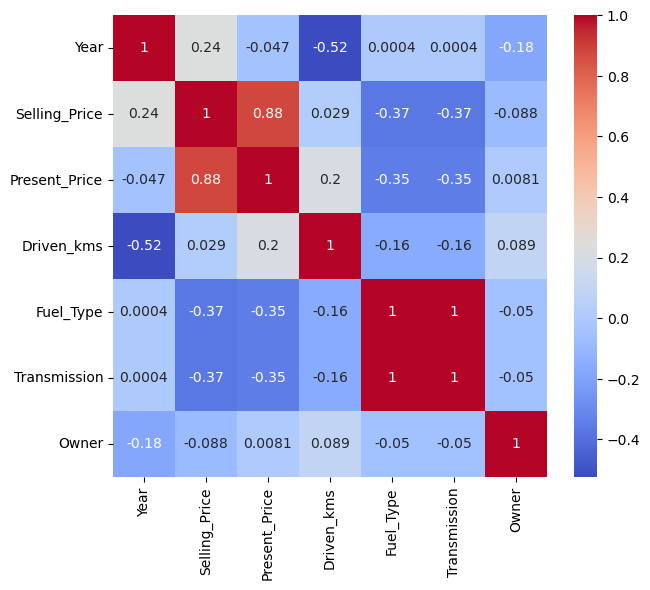

In [11]:
corr = df.corr().round(4)

fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

#### Converting the Years into age 

In [12]:
current_year = pd.Timestamp.now().year
df["Car_Age"] = current_year - df["Year"]
df = df.drop("Year", axis=1)

#### Plotting Selling Price vs Current Price

Text(0, 0.5, 'Selling Price')

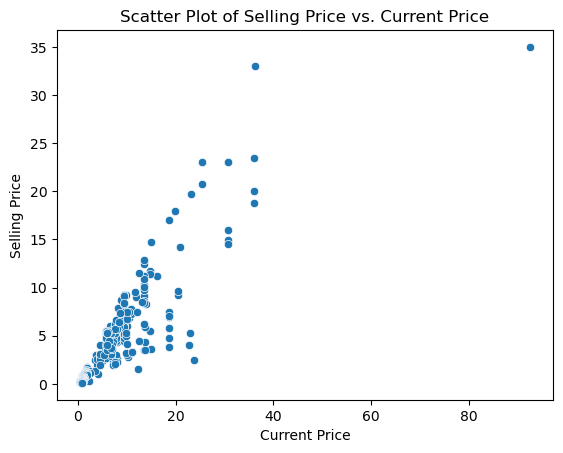

In [13]:
sns.scatterplot(data=df, x="Present_Price", y="Selling_Price")
plt.title("Scatter Plot of Selling Price vs. Current Price")
plt.xlabel("Current Price")
plt.ylabel("Selling Price")

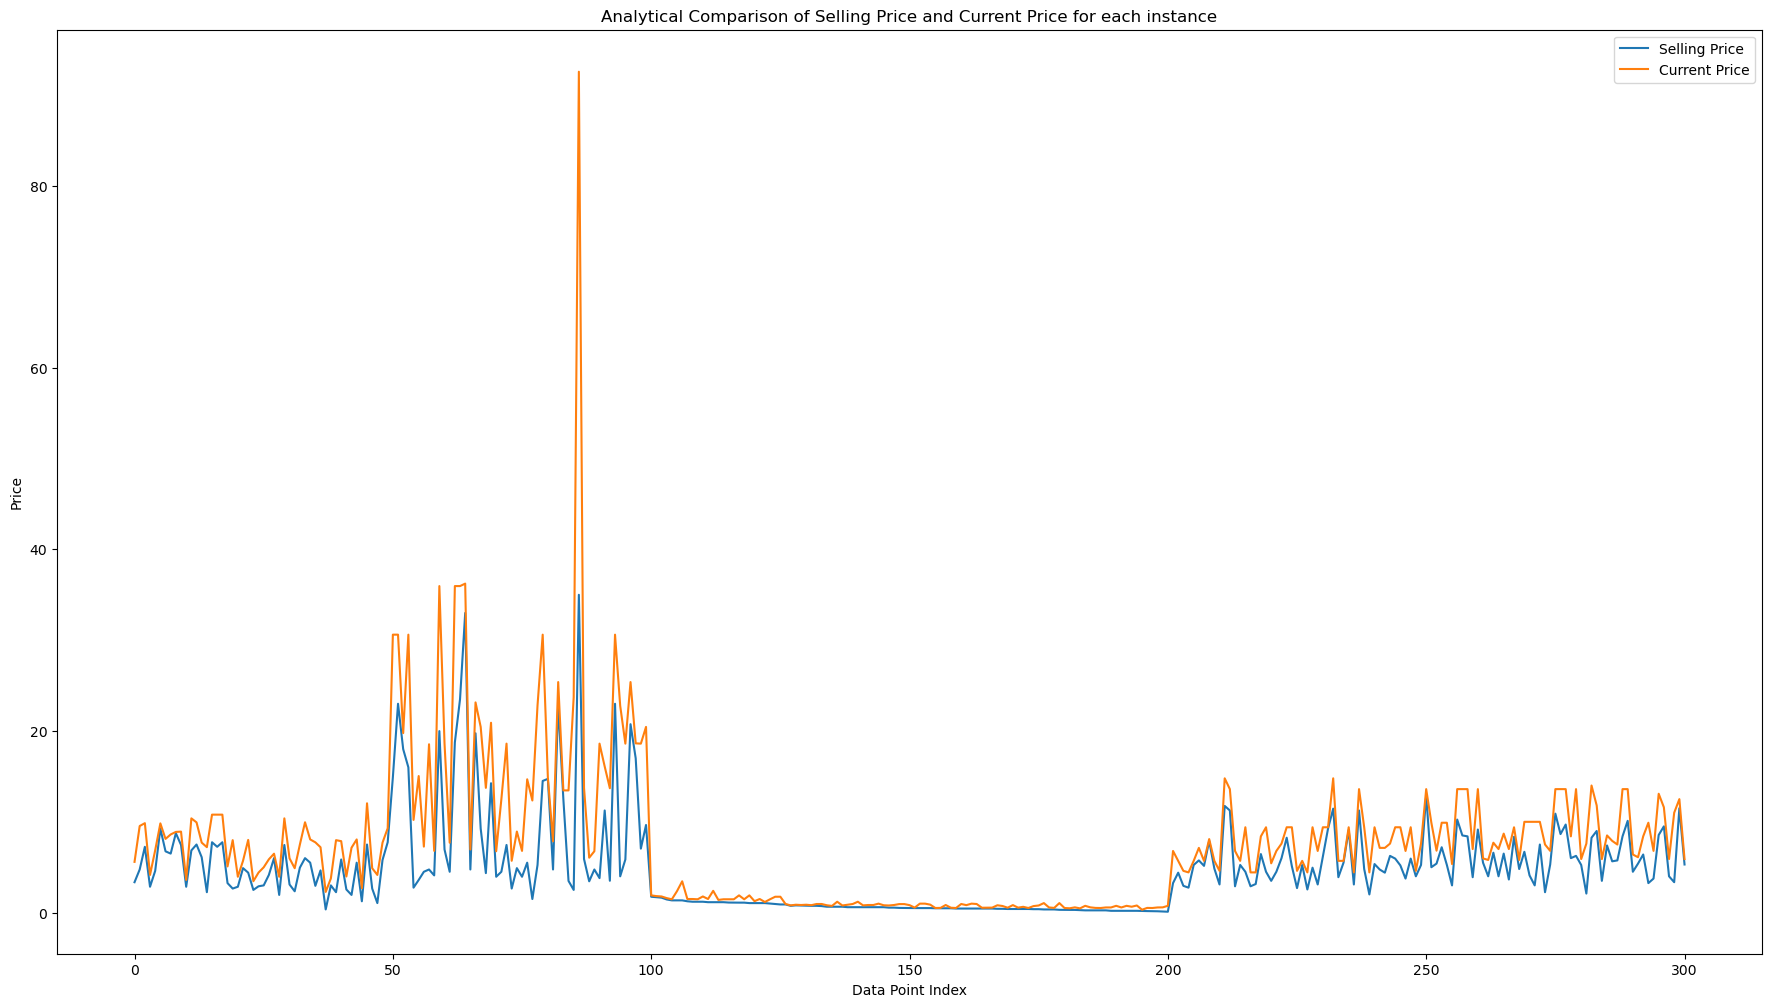

In [14]:
plt.figure(figsize=(22, 12))
sns.lineplot(data=df, x=df.index, y="Selling_Price", label="Selling Price")
sns.lineplot(data=df, x=df.index, y="Present_Price", label="Current Price")

plt.title("Analytical Comparison of Selling Price and Current Price for each instance")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.legend()

#### Learning the models

In [15]:
from sklearn.model_selection import train_test_split
#train - 60
#test - 40
X = df.drop(["Car_Name", "Selling_Price", "Selling_type"], axis=1)
y = df["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
X.head()

,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Car_Age
0,5.59,27000,1,1,0,9
1,9.54,43000,1,1,0,10
2,9.85,6900,1,1,0,6
3,4.15,5200,1,1,0,12
4,6.87,42450,1,1,0,9


In [17]:
model_LR = LinearRegression()
model_tree = DecisionTreeRegressor()
model_forest = RandomForestRegressor()

model_LR.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_forest.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
model_LR_predict = model_LR.predict(X_test)
model_tree_predict= model_tree.predict(X_test)
model_forest_predict = model_forest.predict(X_test)

#### Finding The Mse for These models

In [19]:
linear_reg_mse = mean_squared_error(y_test,model_LR_predict )
tree_mse = mean_squared_error(y_test,model_tree_predict )
random_forest_mse = mean_squared_error(y_test, model_forest_predict)

print("Linear Regression MSE:", linear_reg_mse)
print("Decision Tree MSE:", tree_mse)
print("Random Forest MSE:", random_forest_mse)

Linear Regression MSE: 8.484293266793886
Decision Tree MSE: 1.6316669421487604
Random Forest MSE: 3.3585327638842952


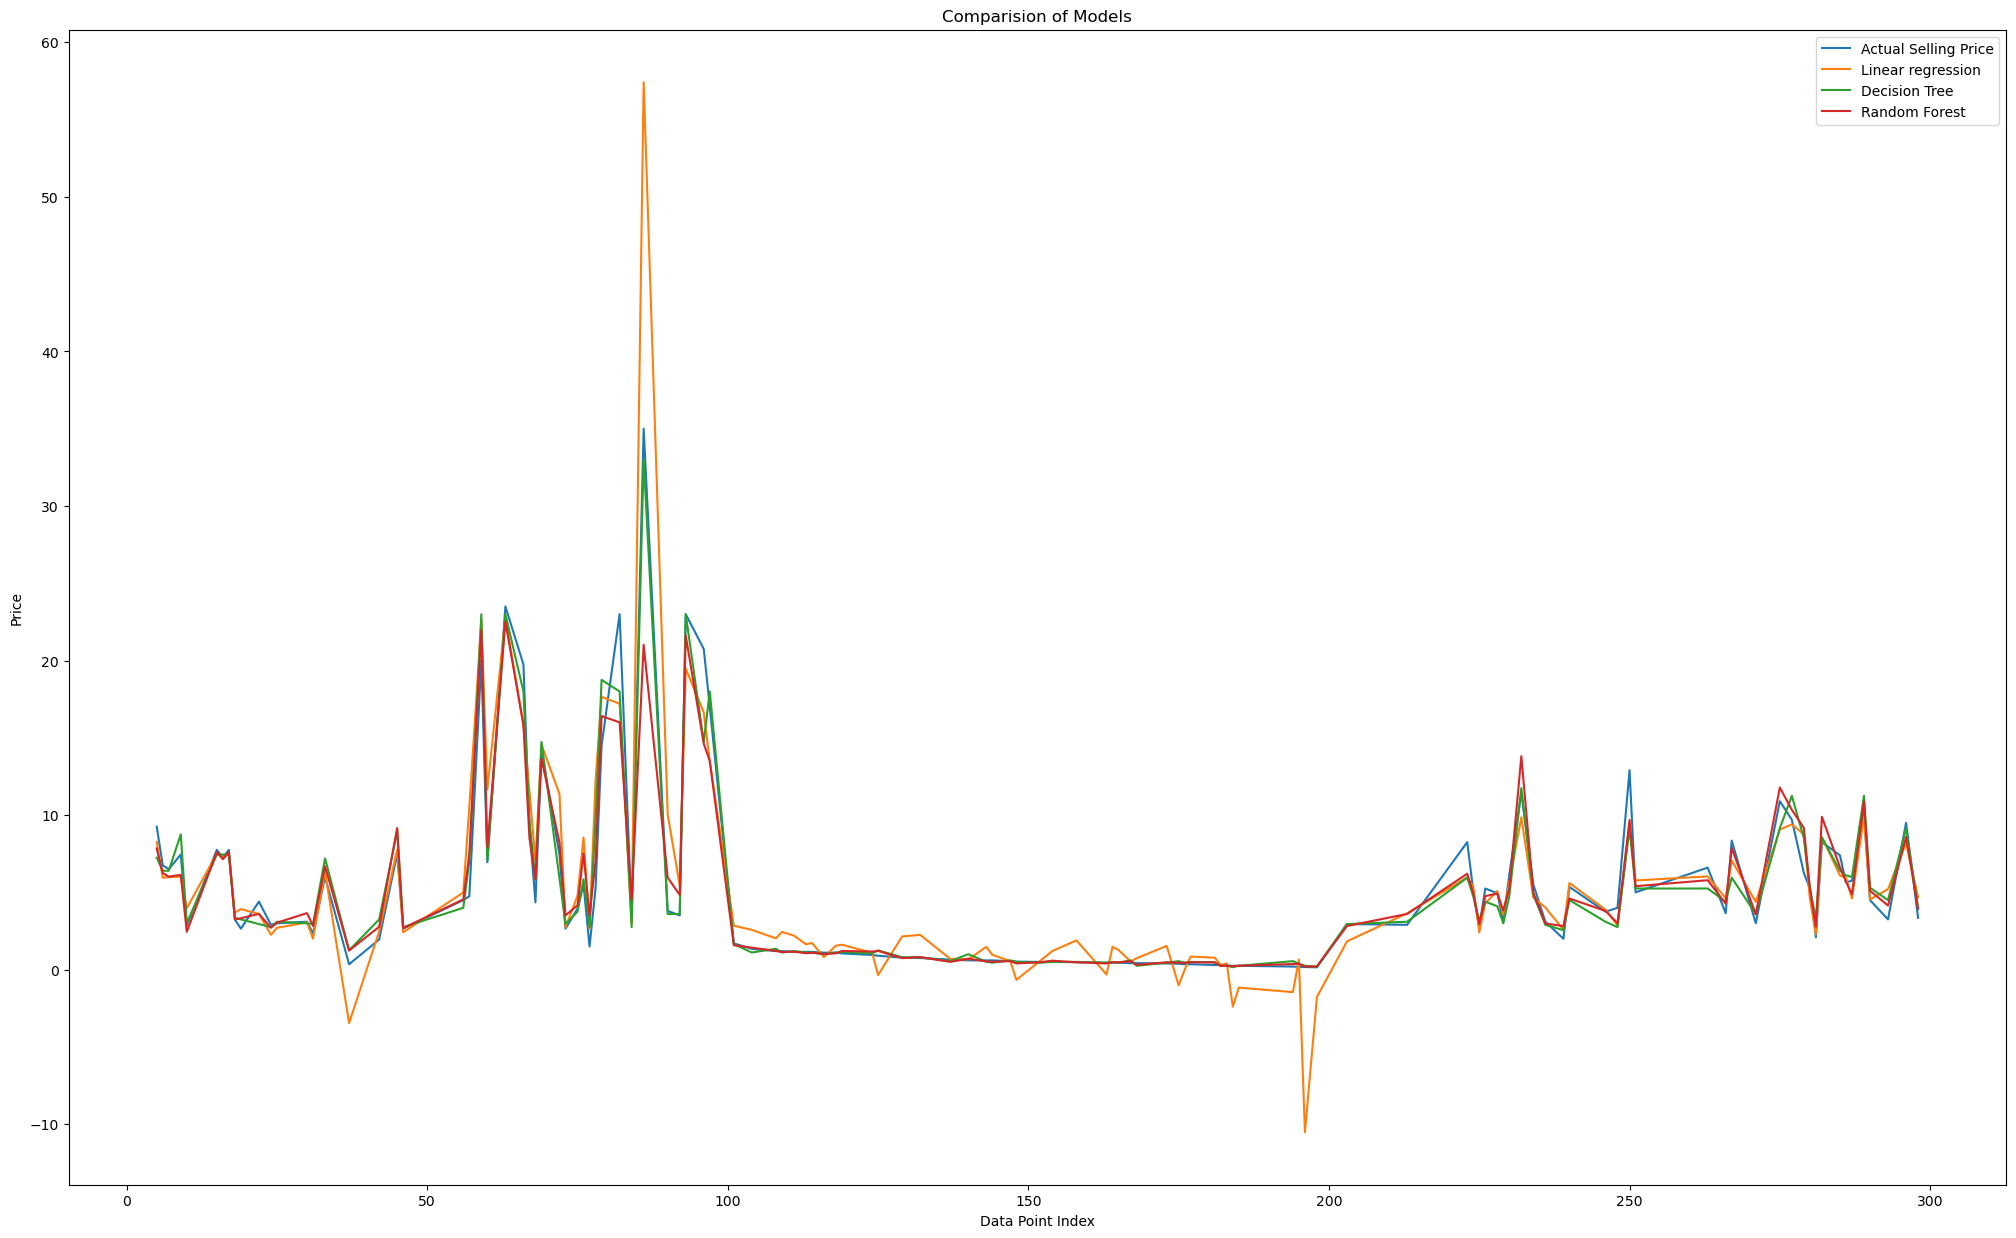

In [20]:
compare = pd.DataFrame({
    "Selling_Price": y_test,
    "Linear_Regression_Predictions":model_LR_predict ,
    "Decision_Tree_Predictions":model_tree_predict ,
    "Random_Forest_Predictions": model_forest_predict
})

plt.figure(figsize=(25, 15))
sns.lineplot(data=compare, x=compare.index, y="Selling_Price", label="Actual Selling Price")
sns.lineplot(data=compare, x=compare.index, y="Linear_Regression_Predictions", label="Linear regression")
sns.lineplot(data=compare, x=compare.index, y="Decision_Tree_Predictions", label="Decision Tree")
sns.lineplot(data=compare, x=compare.index, y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of Models")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.legend()

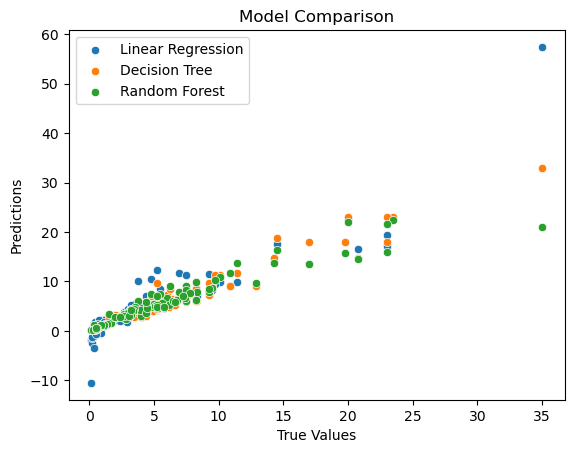

In [21]:
sns.scatterplot(data=compare, x="Selling_Price", y="Linear_Regression_Predictions", label="Linear Regression")
sns.scatterplot(data=compare, x="Selling_Price", y="Decision_Tree_Predictions", label="Decision Tree")
sns.scatterplot(data=compare, x="Selling_Price", y="Random_Forest_Predictions", label="Random Forest")

plt.title("Model Comparison")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()

#### Concluscion

It was a great opportunity for me to work on this project . Here we had to predict the car sales from the given datasets. Here we firstly imported all
the modules required for this projects. Then I performed some data preprocessing on the imported datasets. After that I performed Data analysis to find out the corelation between all the variables. I plotted the corelation matrix for the better visualisation. I converted the years to the age which made handling the data much more easier. I splitted the data set into Tranning and testing . I made the use of Linear Regression , Descion Tree and Random Forest machine Learning models . I comapred between all these models and found out that Random Forest performed best for this Dataset.

Overall I enjoyed doing this project. I hepled me improve my Data Science SKills.